In [412]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testes de hipótese

### Carregando a primeira base de dados (com algumas manipulações realizadas na secção de análise exploratória). Base referente a partidas não-profissionais do servidor lest europeu (EUW).

In [413]:
df = pd.read_csv('gamesExt.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [414]:
df.head()

,towerKillsDiff,inhibitorKillsDiff,baronKillsDiff,dragonKillsDiff,riftHeraldDiff,gameId,creationTime,gameDuration,seasonId,winner,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,6,1,2,2,-1,3326086514,1504279457970,1949,9,1,...,5,0,0,1,1,114,67,43,16,51
1,8,4,0,2,1,3229566029,1497848803862,1851,9,1,...,2,0,0,0,0,11,67,238,51,420
2,6,1,1,0,0,3327363504,1504360103310,1493,9,1,...,2,0,0,1,0,157,238,121,57,28
3,9,2,1,2,0,3326856598,1504348503996,1758,9,1,...,0,0,0,0,0,164,18,141,40,51
4,6,2,1,2,0,3330080762,1504554410899,2094,9,1,...,3,0,0,1,0,86,11,201,122,18


### Algumas funções que realizam as operações necessárias

In [415]:
def compara(df, atributo1, atributo2, pr=0):
    soma = (df[atributo1] == df[atributo2]).sum()
    somaVazio = (df[atributo2] == 0).sum()
    n = df[atributo1].size
    porcentagem = round(soma*100/n,2)
    porcentagemVazio = round(somaVazio*100/n,2)
    if(pr):
        print("Em {}% das partidas as equipes '{}' também conseguem '{}'. {}% das partidas não ocorre '{}'"
              .format(porcentagem, atributo1, atributo2, porcentagemVazio, atributo2))
    return porcentagem

In [416]:
def perm_first(df, atributo1, atributo2, samplesnumber, it=500):
    
    df_copy = df.copy()
    df_copy = df_copy.sample(samplesnumber)

    print("com {} amostras".format(samplesnumber))

    lista = []
    taxaObs = compara(df_copy, atributo1, atributo2, 1)
    df_copy[atributo1] = df_copy[atributo1].copy()
    
    for i in range(it):
        df_copy[atributo1] = np.random.permutation(df_copy[atributo1])
        lista.append(compara(df_copy, atributo1, atributo2, 0))

    plt.figure(figsize=(16, 8))
    plt.hist(lista, bins=30)
    plt.title("Partidas com equipes {} e {}".format(atributo1, atributo2))
    inf = np.percentile(lista, 5)
    sup = np.percentile(lista, 95)
    plt.axvline(x=inf,c='red')
    plt.axvline(x=sup,c='red')
    plt.axvline(x=taxaObs,c='green')
    ax = plt.gca()

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

In [417]:
def novo_atr_diff(df, str1, str2, novaStr, index, winflag, winVal):
    df.insert(index, novaStr, df[str1] - df[str2])
    for index, value in df[winflag].items():
        if value == winVal:
            df[novaStr][index] = -df[novaStr][index]

In [418]:
def diff(df, atributo1, atributo2, winflag):
    winTeam = df.groupby([winflag]).mean()[[atributo1, atributo2]]
    diff = abs(winTeam[atributo1] - winTeam[atributo2]).mean()
    return diff

In [419]:
def diff2(df, atributo, winflag):
    X = df.groupby([winflag])[atributo].mean()
    diff = X[1] - X[0]
    return diff

In [420]:
def perm_diff(df, atributo1, atributo2, winflag, samplesnumber, it=500):
    df_copy = df.copy()
    df_copy = df_copy.sample(samplesnumber)
    lista = []
    taxaObs = diff(df_copy, atributo1, atributo2, winflag)
    print("com {} amostras".format(samplesnumber))
    print("diferença de {} observada entre equipe vencedora e perdedora : {}".format(atributo1, taxaObs))

    for i in range(it):
        if i % 250 == 0: print("iteracoes: {}/{}".format(i, it))
        winArray = np.random.permutation(df_copy[winflag])
        df_copy[winflag] = winArray
        lista.append(diff(df_copy, atributo1, atributo2, winflag))
        
    plt.figure(figsize=(16, 8))
    plt.hist(lista, bins=30)
    inf = np.percentile(lista, 5)
    sup = np.percentile(lista, 95)
    plt.title('Intervalo de confiança gerado por permutação utilizando {} amostras'.format(samplesnumber))
    plt.xlabel('Diferença de {} entre as equipes que conseguiram a vitória e as que não conseguiram'.format(atributo1, winflag))
    plt.axvline(x=inf,c='red')
    plt.axvline(x=sup,c='red')
    plt.axvline(x=taxaObs,c='green')
    ax = plt.gca()

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

In [421]:
def perm_diff2(df, atributo, winflag, samplesnumber, it=1000):
    df_copy = df.copy()
    df_copy = df_copy.sample(samplesnumber)
    lista = []
    taxaObs = diff2(df_copy, atributo, winflag)
    print("com {} amostras".format(samplesnumber))
    print("diferença de {} observada entre {} e não {} : {}".format(atributo, winflag, winflag, taxaObs))

    for i in range(it):
        if i % 250 == 0: print("iteracoes: {}/{}".format(i, it))
        winArray = np.random.permutation(df_copy[winflag])
        df_copy[winflag] = winArray
        lista.append(diff2(df_copy, atributo, winflag))
        
    plt.figure(figsize=(16, 8))
    plt.hist(lista, bins=30)
    plt.title('Intervalo de confiança gerado por permutação utilizando {} amostras'.format(samplesnumber))
    plt.xlabel('Diferença de {} entre os jogadores que conseguiram {} e os que não conseguiram'.format(atributo, winflag))
    inf = np.percentile(lista, 5)
    sup = np.percentile(lista, 95)
    plt.axvline(x=inf,c='red')
    plt.axvline(x=sup,c='red')
    plt.axvline(x=taxaObs,c='green')
    ax = plt.gca()

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

### Análise da proporção de equipes que conseguem o primeiro objetivo e conseguem a vitória. Intervalo de confiança gerado usando permutação.

com 51490 amostras
Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
com 51490 amostras
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
com 51490 amostras
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'


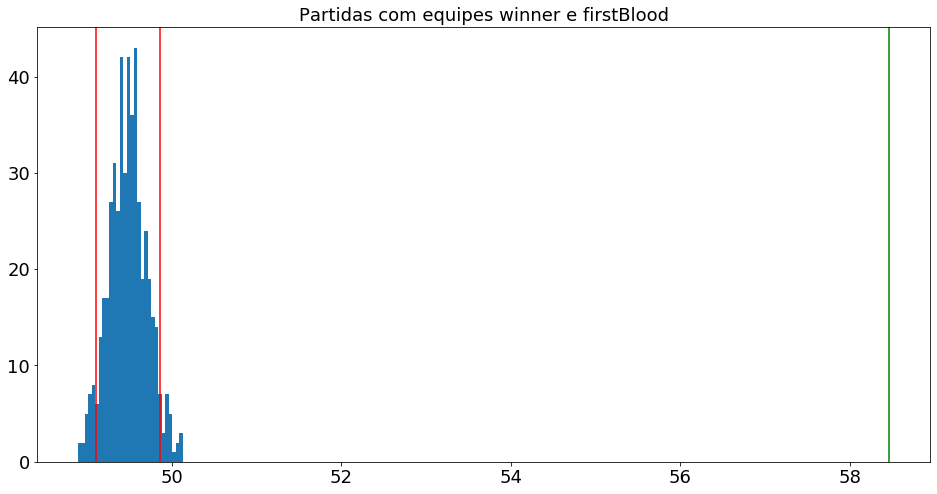

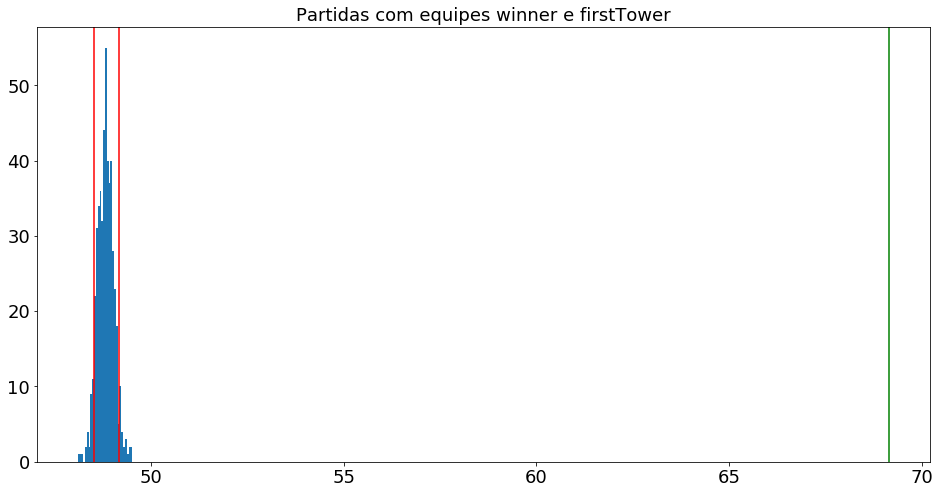

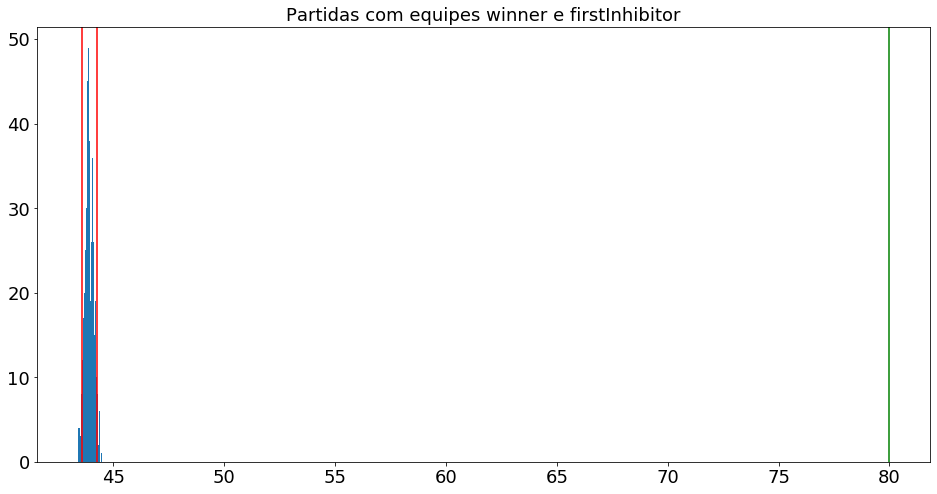

In [422]:
perm_first(df, 'winner', 'firstBlood', df.shape[0])
perm_first(df, 'winner', 'firstTower', df.shape[0])
perm_first(df, 'winner', 'firstInhibitor', df.shape[0])

com 1000 amostras
Em 59.1% das partidas as equipes 'winner' também conseguem 'firstBlood'. 0.2% das partidas não ocorre 'firstBlood'
com 10000 amostras
Em 58.06% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.12% das partidas não ocorre 'firstBlood'
com 51490 amostras
Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'


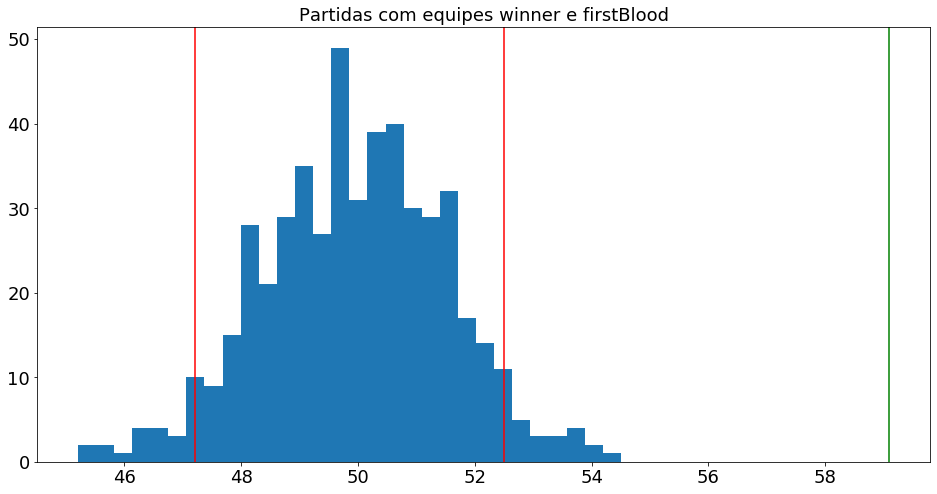

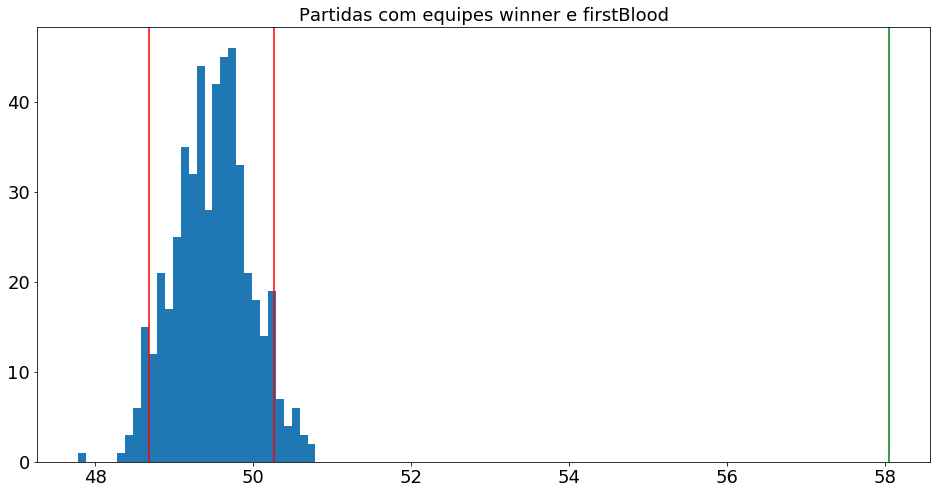

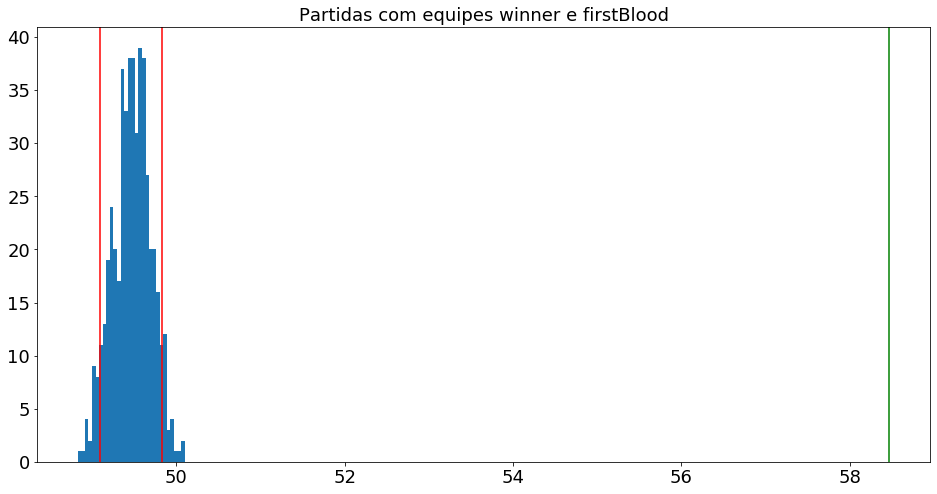

In [423]:
perm_first(df, 'winner', 'firstBlood', 1000)
perm_first(df, 'winner', 'firstBlood', 10000)
perm_first(df, 'winner', 'firstBlood', df.shape[0])

### Diferença de abates de torres entre equipe vencedora e perdedora. Intervalo de confiança gerado usando permutação.

com 1000 amostras
diferença de t1_towerKills observada entre equipe vencedora e perdedora : 5.867806158376545
iteracoes: 0/500
iteracoes: 250/500


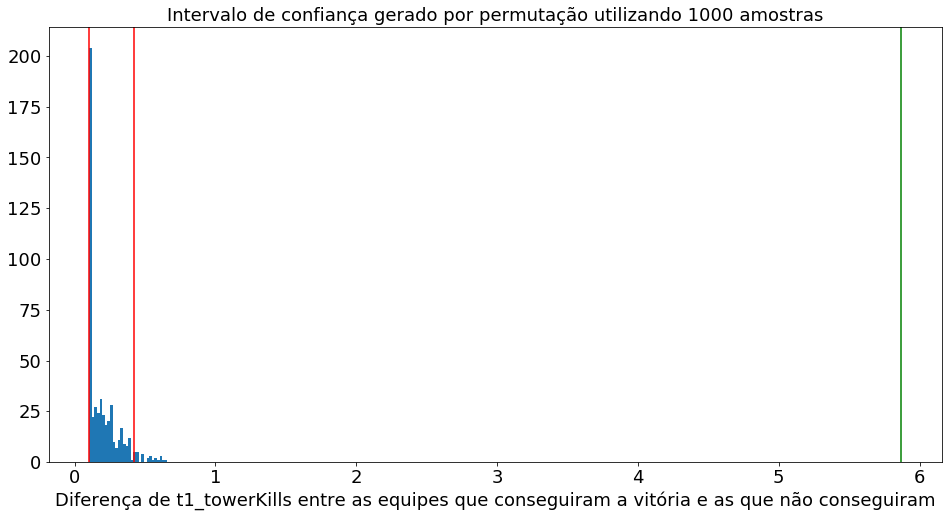

In [424]:
perm_diff(df, 't1_towerKills', 't2_towerKills', 'winner', 1000)

### Carregando segunda base de dados (com algumas manipulações realizadas na secção de análise exploratória). Base referente a partidas competitivas profisisonais.

In [425]:
df2 = pd.read_csv('LeagueofLegendsExtended.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2.columns

Index(['goldred at 5 min', 'goldblue at 5 min', 'goldred at last min',
       'goldblue at last min', 'goldred at 10 min', 'goldblue at 10 min',
       'killsDiff', 'riftHeraldDiff', 'baronKillsDiff', 'dragonKillsDiff',
       'inhibitorKillsDiff', 'towerKillsDiff', 'League', 'Year', 'Season',
       'Type', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag', 'gamelength',
       'golddiff', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons',
       'bBarons', 'bHeralds', 'goldred', 'rKills', 'rTowers', 'rInhibs',
       'rDragons', 'rBarons', 'rHeralds', 'blueTop', 'blueTopChamp',
       'goldblueTop', 'blueJungle', 'blueJungleChamp', 'goldblueJungle',
       'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADC',
       'blueADCChamp', 'goldblueADC', 'blueSupport', 'blueSupportChamp',
       'goldblueSupport', 'blueBans', 'redTop', 'redTopChamp', 'goldredTop',
       'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle',
       'redMiddleChamp', 'goldredMiddle', 'redAD

### Análise da diferença de conquista de objetivos entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de bTowers observada entre equipe vencedora e perdedora : 6.55835234710295
iteracoes: 0/500
iteracoes: 250/500


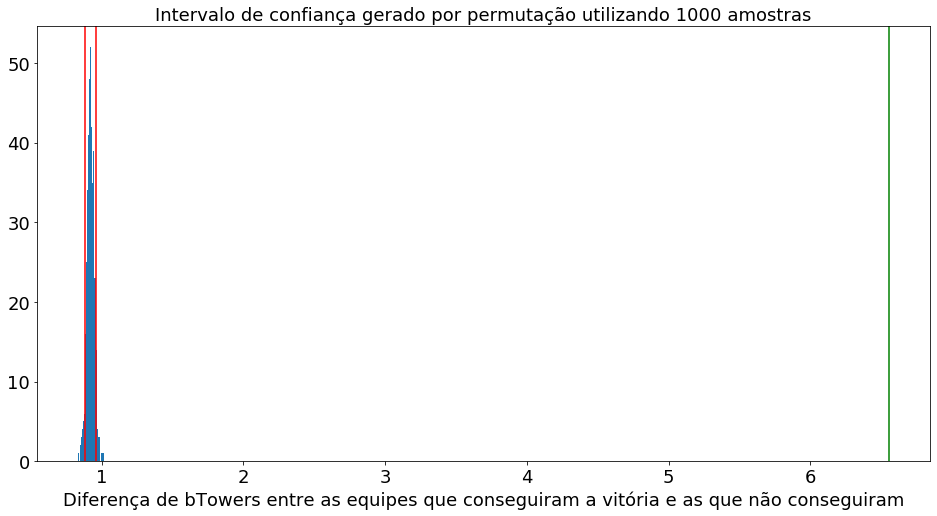

In [426]:
perm_diff(df2, 'bTowers', 'rTowers', 'bResult', 1000)

com 1000 amostras
diferença de bDragons observada entre equipe vencedora e perdedora : 1.2608972884406617
iteracoes: 0/500
iteracoes: 250/500


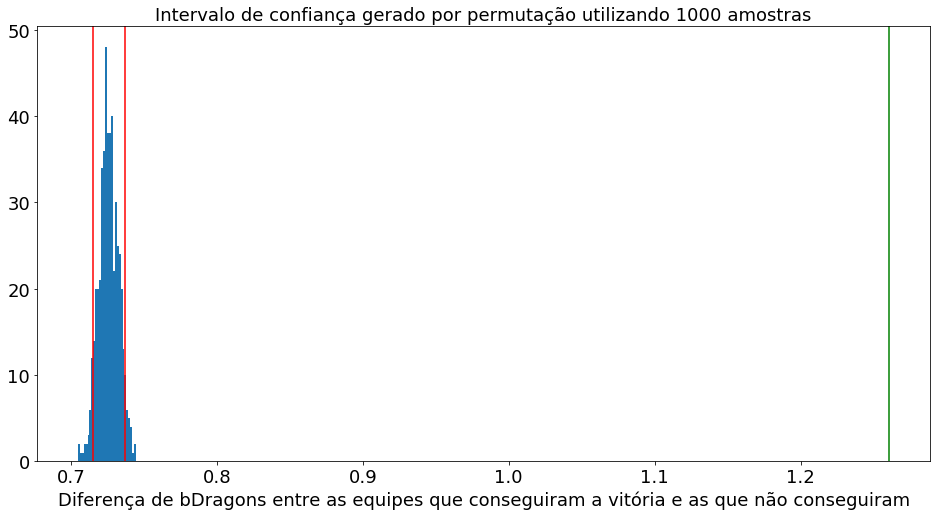

In [427]:
perm_diff(df2, 'bDragons', 'rDragons', 'bResult', 1000)

### Análise da diferença de eliminações entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de bKills observada entre equipe vencedora e perdedora : 8.869413733726
iteracoes: 0/500
iteracoes: 250/500


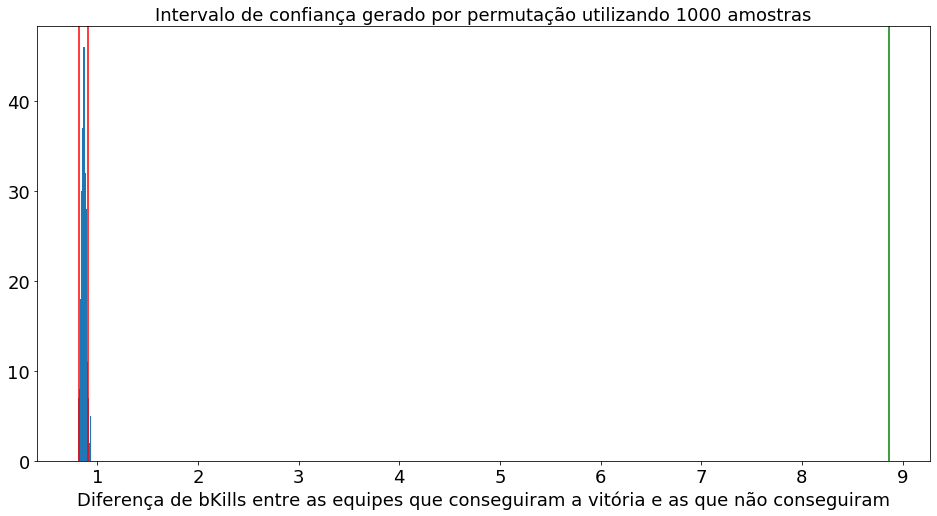

In [428]:
perm_diff(df2, 'bKills', 'rKills', 'bResult', 1000)

### Análise da diferença de ouro adquirido entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de goldred at 5 min observada entre equipe vencedora e perdedora : 171.53236159939433
iteracoes: 0/500
iteracoes: 250/500


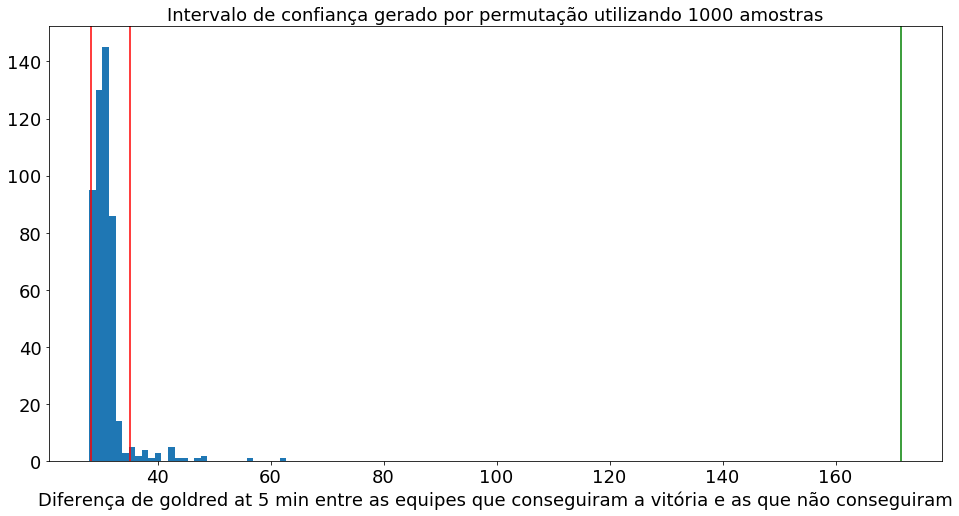

In [429]:
perm_diff(df2, 'goldred at 5 min', 'goldblue at 5 min', 'bResult', 1000)

com 1000 amostras
diferença de goldred at 10 min observada entre equipe vencedora e perdedora : 580.8849624060158
iteracoes: 0/500
iteracoes: 250/500


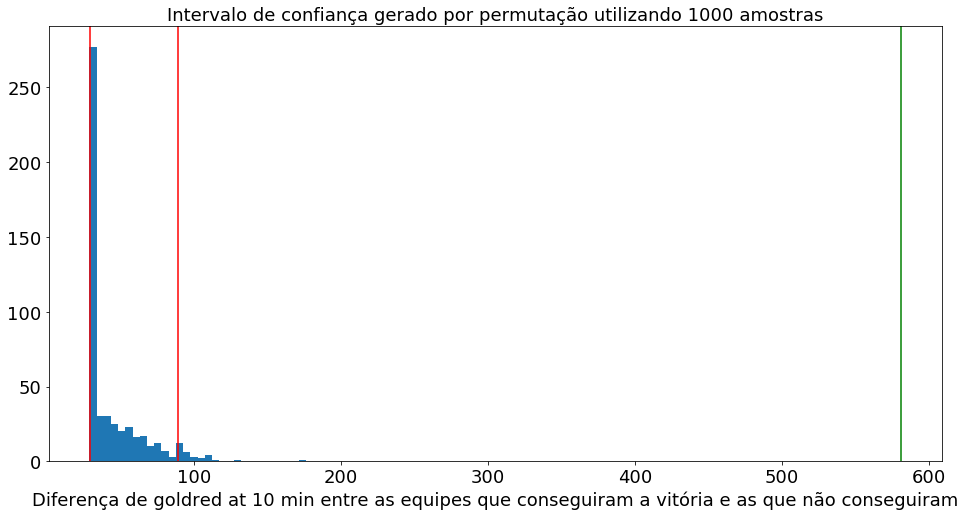

In [430]:
perm_diff(df2, 'goldred at 10 min', 'goldblue at 10 min', 'bResult', 1000)

com 1000 amostras
diferença de goldred at last min observada entre equipe vencedora e perdedora : 10129.132431276244
iteracoes: 0/500
iteracoes: 250/500


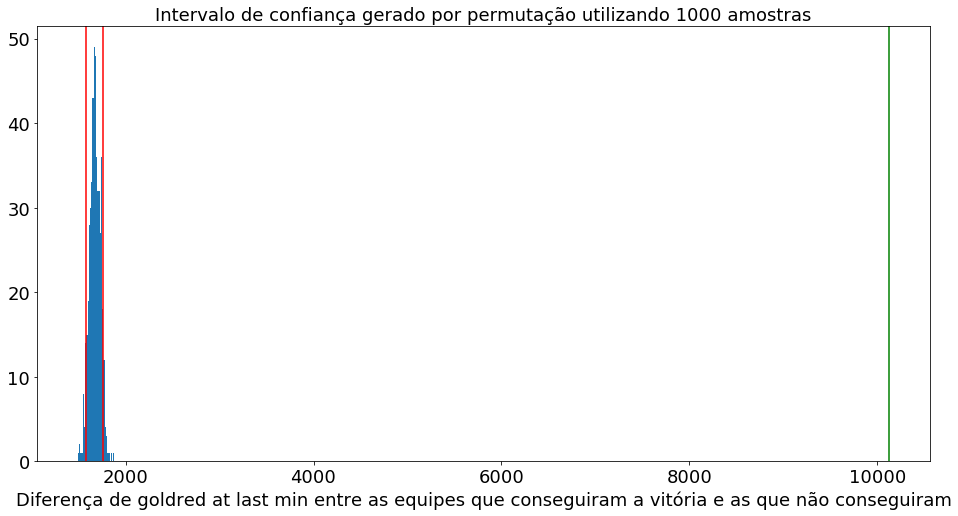

In [431]:
perm_diff(df2, 'goldred at last min', 'goldblue at last min', 'bResult', 1000)

### Carregando a terceira base de dados (com algumas manipulações realizadas na secção de análise exploratória). Base com 1 milhão de registros dados referentes a performance individual dos jogadores.

In [432]:
df3 = pd.read_csv('stats1.csv')
df3.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

### Análise da diferença de performance relacionada a visão de mapa entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de visionscore observada entre win e não win : 1.5440496446802126
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 10000 amostras
diferença de visionscore observada entre win e não win : 1.8919911728431806
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 100000 amostras
diferença de visionscore observada entre win e não win : 1.8224739698958796
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


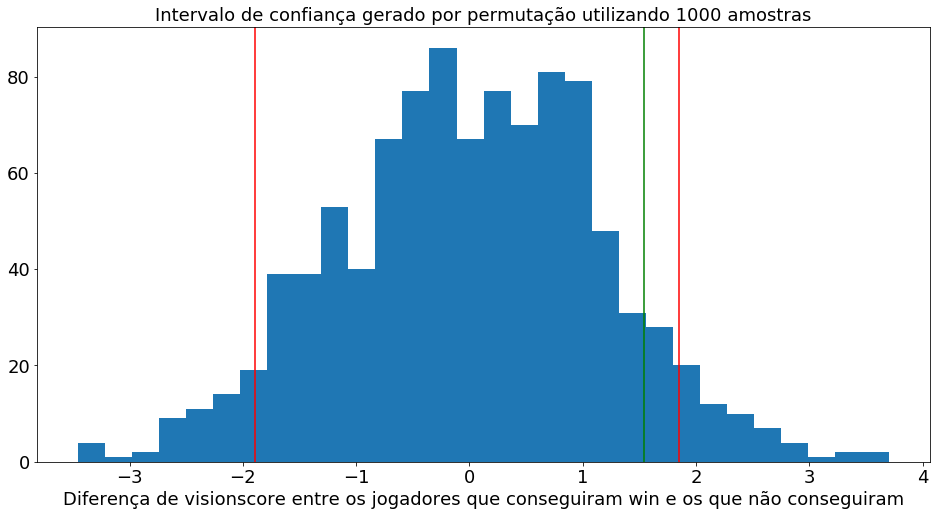

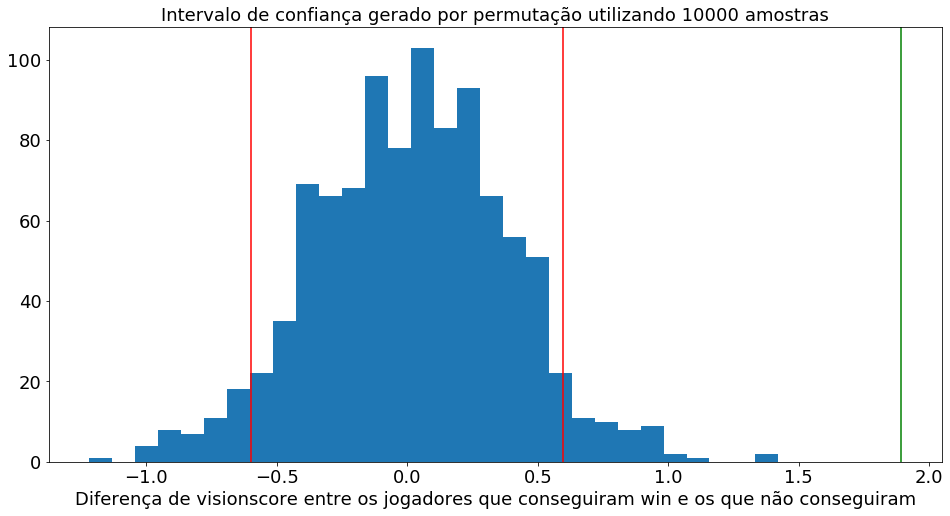

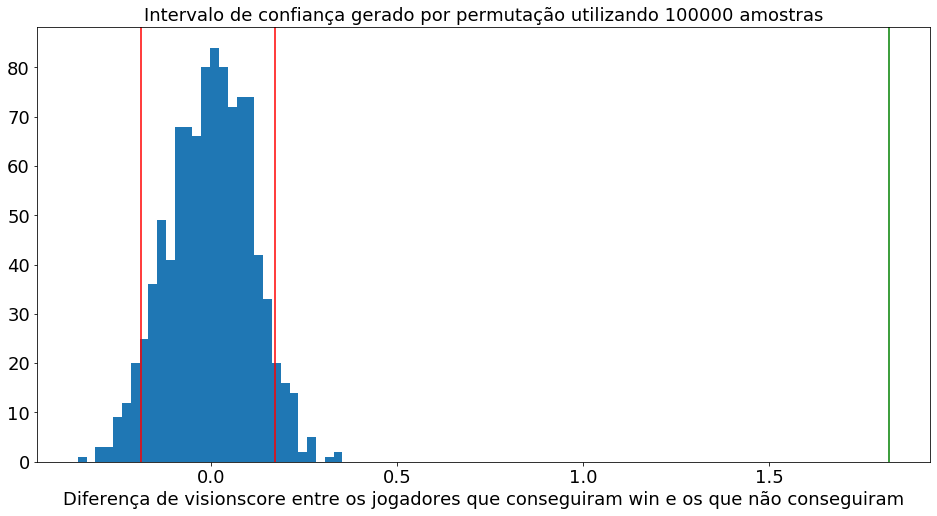

In [433]:
perm_diff2(df3, 'visionscore', 'win', 1000)
perm_diff2(df3, 'visionscore', 'win', 10000)
perm_diff2(df3, 'visionscore', 'win', 100000)

com 1000 amostras
diferença de pinksbought observada entre win e não win : 0.09012670811436996
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 10000 amostras
diferença de pinksbought observada entre win e não win : 0.09420395179574981
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 100000 amostras
diferença de pinksbought observada entre win e não win : 0.09525350218562756
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


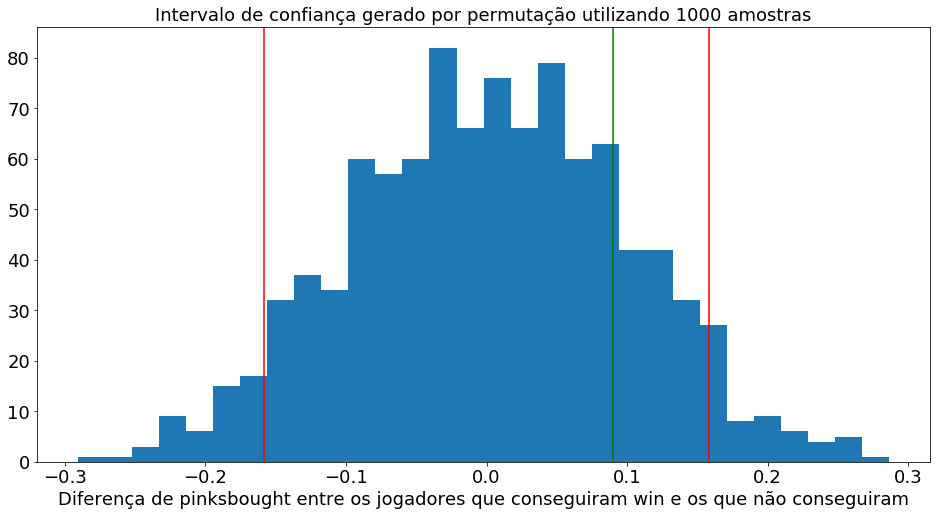

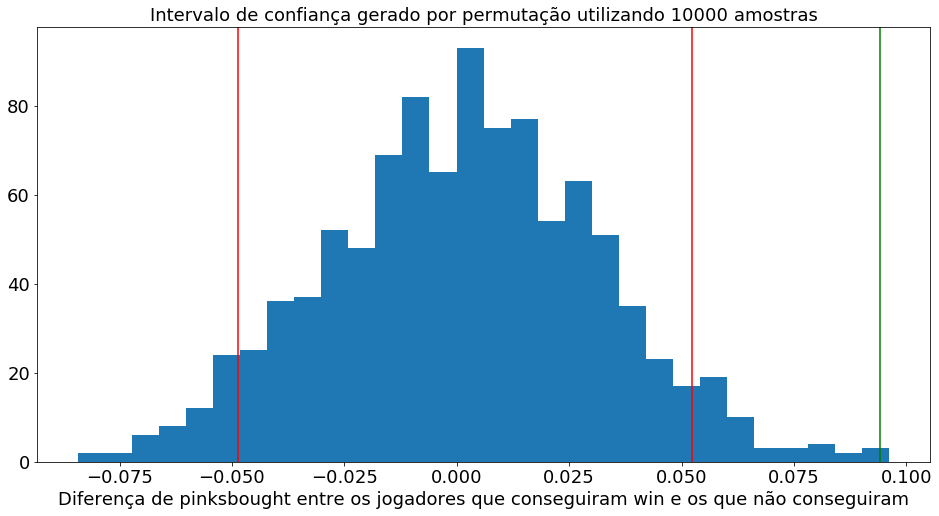

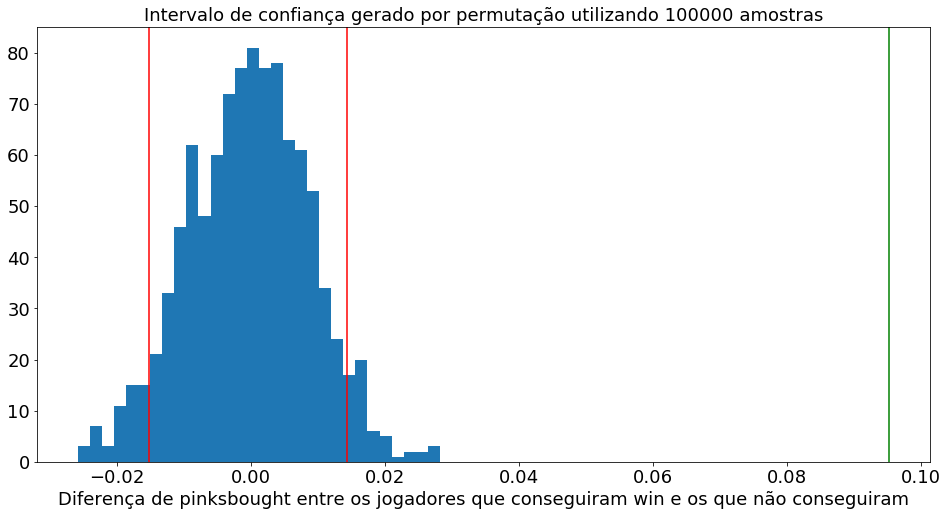

In [405]:
perm_diff2(df3, 'pinksbought', 'win', 1000)
perm_diff2(df3, 'pinksbought', 'win', 10000)
perm_diff2(df3, 'pinksbought', 'win', 100000)

com 1000 amostras
diferença de wardskilled observada entre win e não win : 0.017182309594124145
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 10000 amostras
diferença de wardskilled observada entre win e não win : 0.16721720079276903
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 100000 amostras
diferença de wardskilled observada entre win e não win : 0.17829765883579807
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


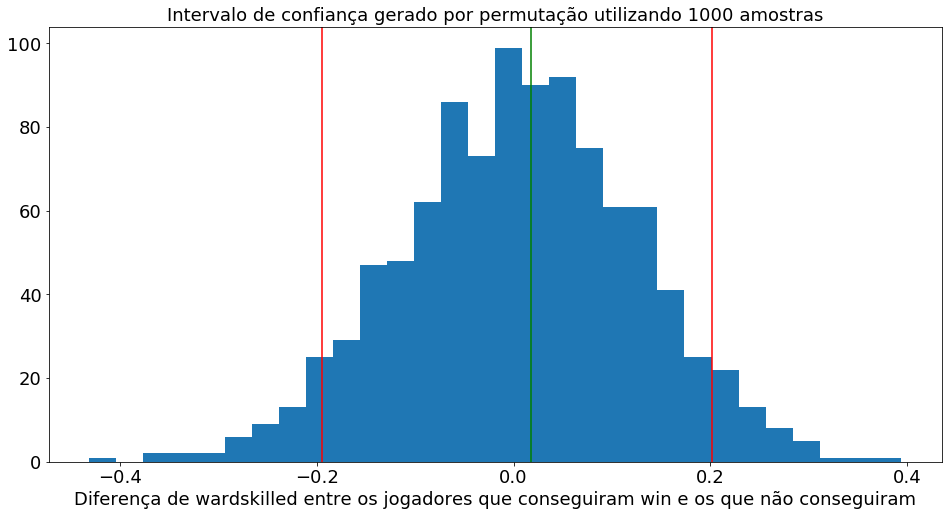

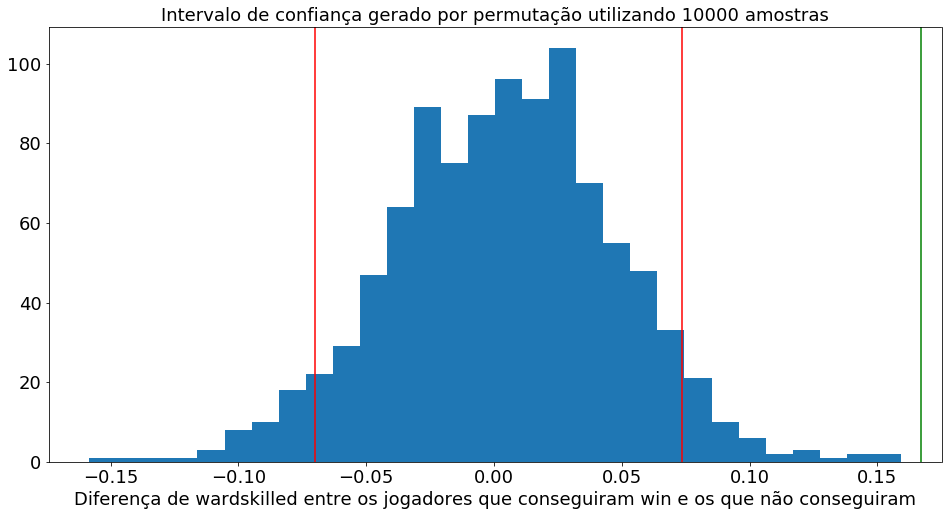

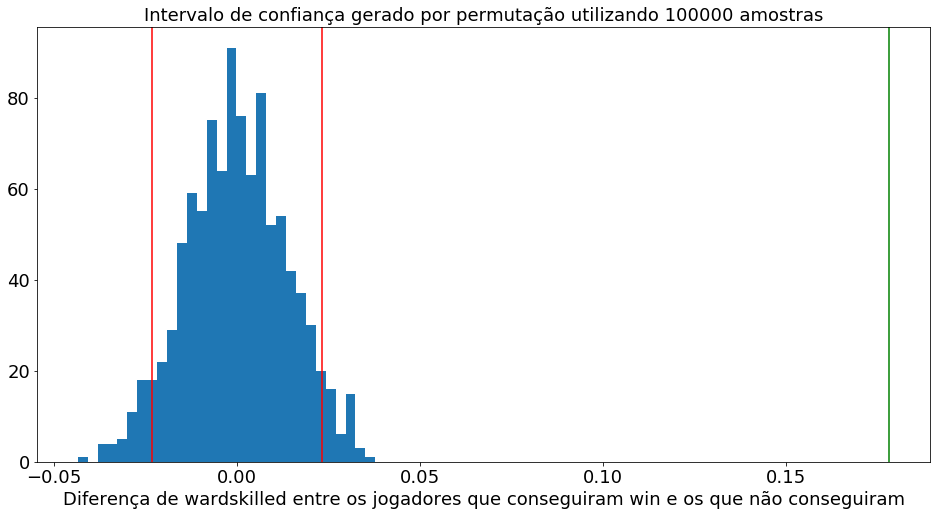

In [409]:
perm_diff2(df3, 'wardskilled', 'win', 1000)
perm_diff2(df3, 'wardskilled', 'win', 10000)
perm_diff2(df3, 'wardskilled', 'win', 100000)

### Análise da diferença de número de assistências entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de assists observada entre win e não win : 3.991213750720185
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


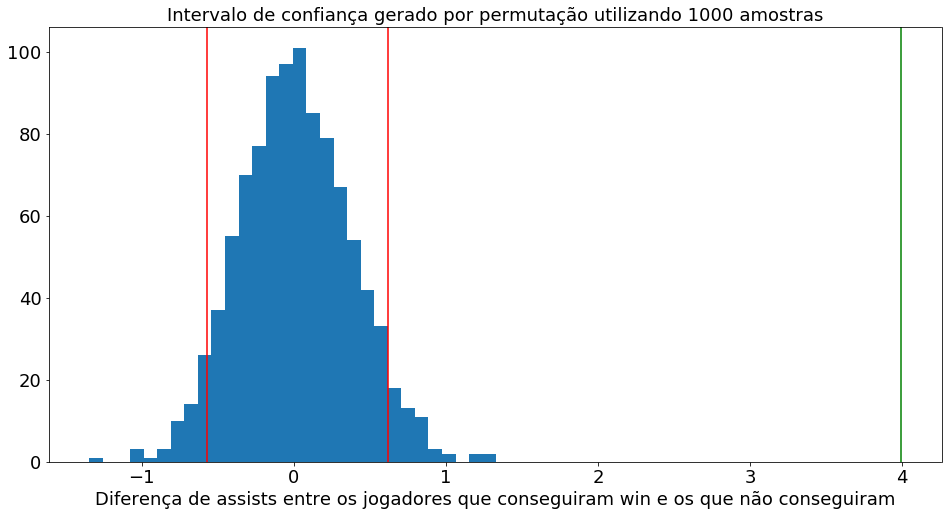

In [373]:
perm_diff2(df3, 'assists', 'win', 1000)

### Análise da diferença de ouro gasto entre a equipe vencedora e perdedora.

com 1000 amostras
diferença de goldspent observada entre win e não win : 1100.1342174386555
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


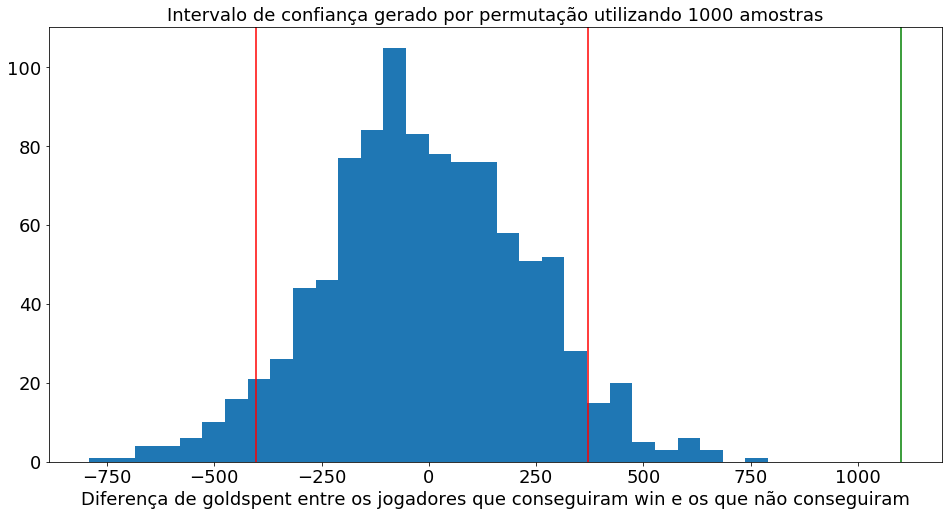

In [374]:
perm_diff2(df3, 'goldspent', 'win', 1000)

com 1000 amostras
diferença de totcctimedealt observada entre win e não win : -18.55013706535857
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000
com 10000 amostras
diferença de totcctimedealt observada entre win e não win : 51.387455332496586
iteracoes: 0/1000
iteracoes: 250/1000
iteracoes: 500/1000
iteracoes: 750/1000


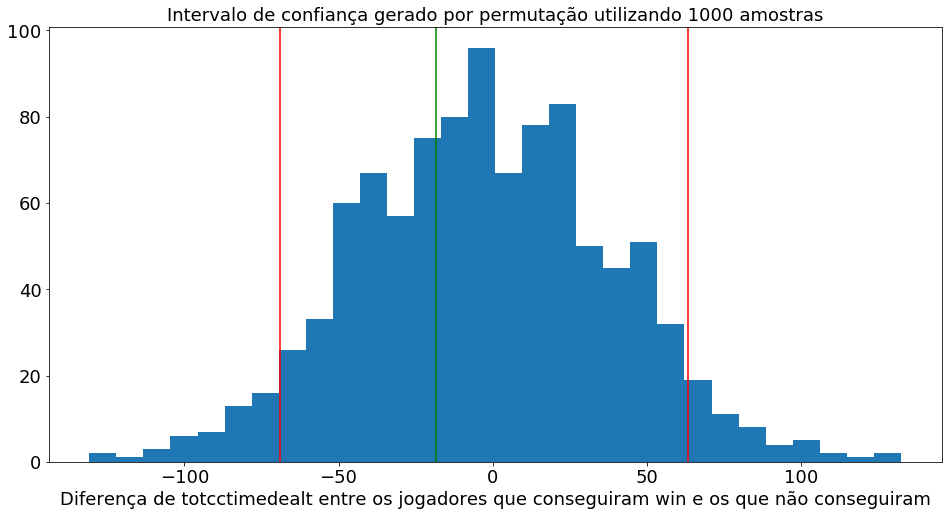

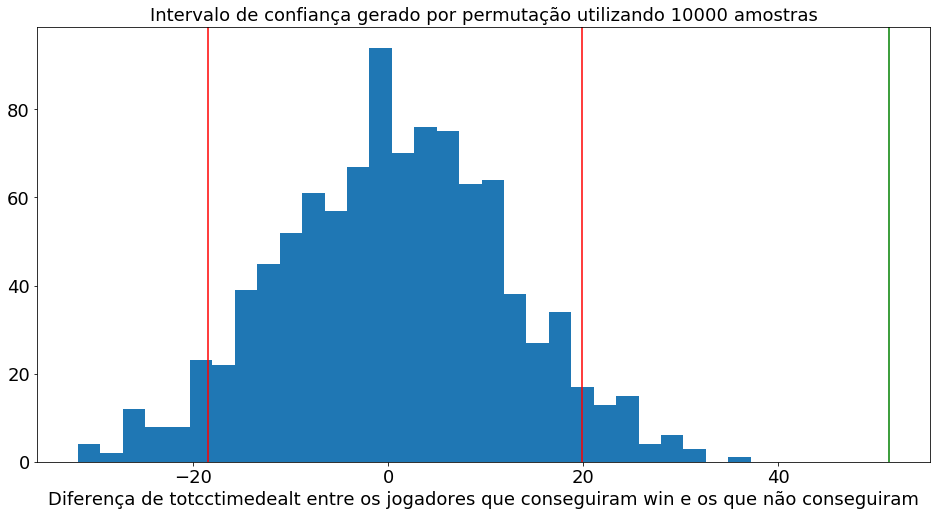

In [408]:
perm_diff2(df3, 'totcctimedealt', 'win', 1000)
perm_diff2(df3, 'totcctimedealt', 'win', 10000)